In [1]:
from konlpy.corpus import kolaw

const_doc = kolaw.open('constitution.txt').read()
print(type(const_doc))
print(len(const_doc))

<class 'str'>
18884


In [2]:
from konlpy.tag import Okt
t = Okt()
tokens_const = t.nouns(const_doc)
tokens_const = [token for token in tokens_const if len(token) > 1]
print('토큰의 수:', len(tokens_const))
print('앞 10개의 토큰:')
print(tokens_const[:10])

토큰의 수: 3013
앞 10개의 토큰:
['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국']


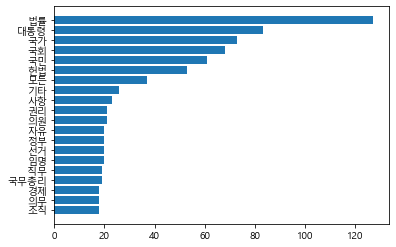

In [3]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt

font_name = font_manager.FontProperties(fname='c:/windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

const_word_count = dict()
for word in tokens_const:
    const_word_count[word] = const_word_count.get(word,0)+1
    
sorted_word_count = sorted(const_word_count, key=const_word_count.get, reverse=True)

n = sorted_word_count[:20][::-1]
w = [const_word_count[key] for key in n]
plt.barh(range(len(n)), w, tick_label=n)
plt.show()

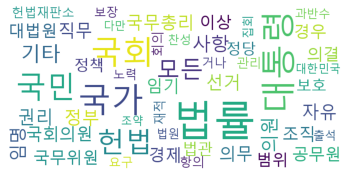

In [4]:
from wordcloud import WordCloud
font_path = 'c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(
    font_path = font_path,
    max_font_size = 100,
    width = 800,
    height = 400,
    background_color = 'white',
    max_words = 50)

wordcloud.generate_from_frequencies(const_word_count)
wordcloud.to_file('const.png')
plt.axis('off')
plt.imshow(wordcloud)
plt.show()